# Examen 3

### 1) Determine el espacio de configuraciones, en los ejes (x, v), del movimiento horizontal sin fricción de una masa de $0.2\ \text{Kg}$ atada a un resorte de constante elástica $k=1\ \text{N/m}$ .


La ecuación diferencial para un sistema masa - resorte sin fricción está dada por la ecuación: 

\begin{equation}
\frac{d^{2}x}{dt^{2}} + \omega^{2} x = 0
\end{equation}

en donde 

\begin{equation}
\omega =  \sqrt{\frac{k}{m}}
\end{equation}


Podemos reescribir esta ecuación diferencial de segundo orden como un sistema de ecuaciones diferenciales en forma matricial como: 


\begin{equation}
v = \frac{dx}{dt}
\end{equation}

\begin{equation}
U=
\begin{bmatrix}
U_{0}\\
U_{1}
\end{bmatrix}=
\begin{bmatrix}
x\\
v
\end{bmatrix}
\end{equation}



\begin{equation}
\frac{d}{dt}
\begin{bmatrix}
x\\
v
\end{bmatrix}=
\begin{bmatrix}
v\\
-\omega^{2}x
\end{bmatrix}
\end{equation}


\begin{equation}
\frac{d}{dt} U = 
\begin{bmatrix}
U_{1}\\
-\omega^{2}U_{0}
\end{bmatrix}
\end{equation}


In [4]:
# Importamos los modulos
import numpy as np 
from matplotlib import pyplot as plt
from scipy import integrate

# definimos las constantes del modelo 
m = 0.2
k = 1
ω = np.sqrt(k/m)

In [7]:
# definimos la función para el sistema matricial 

def dU_dt(U, t, ω=ω): 
    return [U[1], 
           -ω**2*U[0]] 

Text(0.5, 1.0, 'Conjunto de condiciones iniciales')

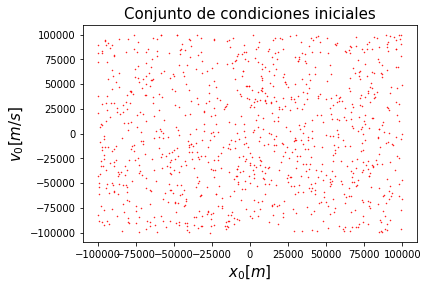

In [94]:
# Ahora vamos a definir el conjunto de parametros iniciales

N = 1000
x_max = 1E5
v_max = 1E5

#x_0 = 10**(np.random.uniform(-np.log10(xmax),np.log10(xmax),N))
#x_1 = 10**(np.random.uniform(-np.log10(xmax),np.log10(xmax),N))

x_0 = np.random.uniform(-x_max,x_max,N)
v_0 = np.random.uniform(-v_max,v_max,N)

# Vamos a graficar para verificar que los puntos si estan uniformemente distribuidos, los cual nos da el mayor conjunto
# posible de condiciones iniciales

plt.plot(  x_0, v_0,'r.', markersize=1) 
plt.xlabel('$x_{0} [m]$', size= 15)
plt.ylabel('$v_{0} [m/s]$', size= 15)
plt.title('Conjunto de condiciones iniciales', size=15)


Text(0, 0.5, '$v \\: [m/s]$')

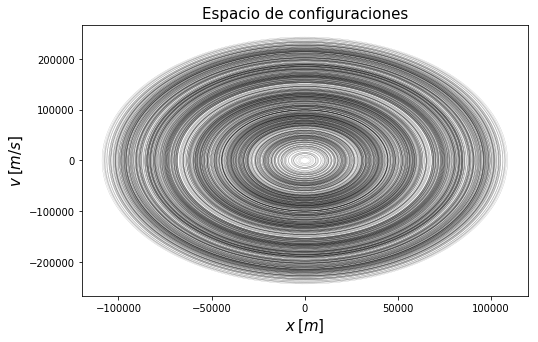

In [95]:
# Ahora vamos a resolver la ecuación diferencial para todo el conjunto de condiciones iniciales

t_max = ω *10
t=np.linspace(0,t_max,500) # Definimos un intervalo máximo de tiempo

plt.figure( figsize = (8,5) )


for x,v in zip(x_0, v_0):
    U_0 = [x,v]
    U = integrate.odeint(dU_dt,U_0,t)
    plt.plot(U[:,0],U[:,1],lw=0.01, color='black')

plt.title('Espacio de configuraciones', size =15)
plt.xlabel('$x \: [m]$', size=15)
plt.ylabel('$v \: [m/s]$', size=15)

### 2) 
Considere una muestra de Strontium-90 ${}^{90}_{38}\text{Sr}$, que contieme inicialmente 1000 núcleos de Strontium-90 sin decaer. En la base de datos:

https://raw.githubusercontent.com/restrepo/ComputationalMethods/master/data/strontium.json

se tienen los datos de decaimiento durante 200 años. Despues de 10 años quedan 809 nucleos sin decaer, después de 22 años quedan 564 y así sucesivamente.

El decaimiento radiativo está determinado por la formula: 

\begin{equation}
N(t)=N_0 \operatorname{e}^{-\lambda t}\,,\qquad \lambda=\frac{\ln(2)}{\tau}
\end{equation}


-  $N(t)$ es el número de núcleos radioactivos que qedan despues de un tiempo $t$
-  $N_0$ es el número inicial de las partículas presentes (es decir $t=0$)
-  $\lambda$ es la constante de decaimiento
- $\tau$ es la vida medía, es decir, el tiempo durante el cual la mitad de la muestra radioactiva ha decaído.

(a) Realice un fit a los datos y determine la vida media con su respectivo error.

(b) Grafique los datos como puntos en el plano $t$, $N(t)$ y el correspondiente al fit.


In [145]:
# Importamos los modulos a utilizar
import pandas as pd
import scipy.optimize as optimize


In [196]:
# Leemos los datos con pandas 
df=pd.read_json("https://raw.githubusercontent.com/restrepo/ComputationalMethods/master/data/strontium.json")
df

,t,N(t)
0,0,1000
1,10,809
2,22,564
3,33,480
4,40,370
5,50,285
6,60,199
7,70,169
8,80,131
9,99,101


In [197]:
# Creamos la función que describe el comportamiento del modelo, con la cual vamos a ajustar los datos

def func(t,a,b):
    return a*np.exp(-b*t)

In [198]:
starting_parameters = [0,0] # Definimos los parametros iniciales

p,Δp = optimize.curve_fit(func, df['t'], df['N(t)'], p0=starting_parameters) # Encontramos los parametros que ajustan los datos


In [217]:
N_0 = p[0]
λ = p[1]
ΔN = Δp[0][0]
Δλ = Δp[1][1]

print('Los parametros calculados por el ajuste son:'
      '\nλ = {:.9f}  Δλ = {:.9f} \nN_0 = {:.3f}  ΔN_0 = {:.3f}'.format(λ,Δλ,N_0,ΔN))

Los parametros calculados por el ajuste son:
λ = 0.025074358  Δλ = 0.000000210 
N_0 = 1012.950  ΔN_0 = 134.310


In [218]:
# Calculamos la vida media 
τ = np.log(2)/λ
τ

27.6436664783182

Para calcular el error vamos a tener en cuenta lo siguiente: 

Primero consideremos una función de cualquier número de variables, ejemplo $f = f(x,y,z)$ la cual tiene un error asociado $df$.

El error $df$ está dado por: 

\begin{equation}
df = \frac{\partial f}{\partial x} dx + \frac{\partial f}{\partial y} dy + \frac{\partial f}{\partial z} dz  
\end{equation}

En nuestro caso tenemos una función de una sola variable $f(\lambda)$ y el error está dado de la siguiente manera:

\begin{equation}
\tau = f(\lambda) = \frac{log(2)}{\lambda} 
\end{equation}

\begin{equation}
\Delta\tau = \frac{\partial \tau}{\partial \lambda} \Delta\lambda = -\frac{log(2)}{\lambda^{2}} \Delta\lambda 
\end{equation}

Debido a que es un error asociado, podemos omitir el signo negativo, y reorganizando tenemos que el error es: 

\begin{equation}
\Delta\tau =  \tau \frac{\Delta\lambda}{\lambda} 
\end{equation}


In [219]:
# Calculamos el error de la vida media 
Δτ = τ * (Δλ/λ)
Δτ

0.000230983531091748

In [220]:
print('La vida media es τ = {:.6f} años con un error de Δτ = {:.6f} años '.format(τ,Δτ))

La vida media es τ = 27.643666 años con un error de Δτ = 0.000231 años 


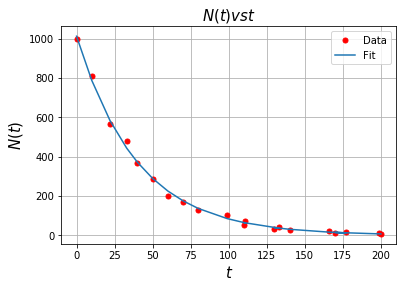

In [221]:
# Graficamos los datos contenidos en la base de datos y el correspondiente ajuste exponencial 

plt.plot(df['t'], df['N(t)'],'ro', markersize=5, label='Data')
plt.plot(df['t'],func(df['t'],N_0,λ), label = 'Fit')
plt.title ('$N(t) vs t$', size = 15)
plt.xlabel('$t$', size=15)
plt.ylabel('$N(t)$',size=15)
plt.grid()
plt.legend()